# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [1]:
import numpy as np
A = np.full([3,4], True, dtype=bool)
print(A)


B = np.diagflat((1,2,3,4),-1)
print(B)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [34]:
C = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        if((i + j)% 2 == 1):
            C[i][j] = 1
print(C)

d = np.random.randint(10,99,4)
for i in range(4):
    if(d[i] % 2 == 1):
            d[i] *= -1
print(d)

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]
[-69  86 -67 -43]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [50]:
A = np.random.rand(5,5)
B = np.random.rand(5,5)
print(np.matmul(A,B).T - np.matmul(B.T,A.T))

np.newaxis = 5
u = np.random.rand(np.newaxis)
v = np.random.rand(np.newaxis)
print(np.outer(u,v))


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0.44869965 0.48839357 0.76682357 0.06717717 0.05138793]
 [0.44708405 0.48663505 0.76406253 0.06693529 0.0512029 ]
 [0.37743809 0.4108279  0.64503822 0.05650823 0.0432266 ]
 [0.18477836 0.20112465 0.31578451 0.02766413 0.02116199]
 [0.19460768 0.21182352 0.33258274 0.02913573 0.0222877 ]]


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [61]:
D = np.tile(((0,1,0,1,0,1,0,1),(1,0,1,0,1,0,1,0)),(4,1))
print(D)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [16]:
A = integer_spiral(5)
print(A)

[[13. 12. 11. 10. 25.]
 [14.  3.  2.  9. 24.]
 [15.  4.  1.  8. 23.]
 [16.  5.  6.  7. 22.]
 [17. 18. 19. 20. 21.]]


In [57]:
def integer_spiral_numpy(n): 

    vektor = np.linspace(1,n**2, n**2)
    A = np.zeros([n,n])

    i = -1
    pocet = n

    A[n//2,n//2] = 1

    while(pocet > 1):
        
        A[:,i] += np.append(  
            np.append(  np.zeros((n - pocet) // 2)
            ,vektor[:(vektor.size-pocet-1):-1])
        ,np.zeros((n-pocet)//2))

        vektor = vektor[:(vektor.size - pocet)]
        pocet -= 1

        A[i,:] +=  np.append(
            np.append(np.zeros((n-pocet)//2)
            ,np.sort(vektor[:(vektor.size-pocet-1):-1]))
        ,np.zeros((n-pocet)//2 + 1))
        
        vektor = vektor[:(vektor.size - pocet)]
        i *= -1
        i -= 1
        
        A[:,i] +=  np.append(
            np.append(np.zeros((n-pocet)//2)
            ,np.sort(vektor[:(vektor.size-pocet-1):-1]))
        ,np.zeros((n-pocet)//2+1))

        vektor = vektor[:(vektor.size-pocet)]
        pocet -= 1
        
        A[i,:] +=  np.append(
            np.append(np.zeros((n-pocet)//2)
            ,vektor[:(vektor.size-pocet-1):-1])
        ,np.zeros((n-pocet)//2))

        vektor = vektor[:(vektor.size-pocet)]
        i *= -1
        i -= 2

    return A

A = integer_spiral_numpy(5)
print(A)

[[13. 12. 11. 10. 25.]
 [14.  3.  2.  9. 24.]
 [15.  4.  1.  8. 23.]
 [16.  5.  6.  7. 22.]
 [17. 18. 19. 20. 21.]]


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
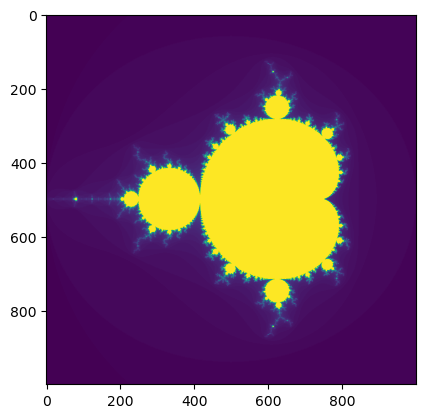

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    
    x = np.linspace(x_min, x_max, n).reshape((1, n))
    y = np.linspace(y_min, y_max, n).reshape((n, 1))
    c = x + 1j * y

    z = np.zeros(c.shape, dtype=np.complex64)   # Prazdna matice, ale typu complex
    divergence_matrix = np.zeros(z.shape)       # stejne velka jako z 
    m = np.full(c.shape, True, dtype=bool)      # pomocna matice pro uz divergovane prvky

    for i in range(k):
        z[m] = z[m]**2 + c[m]                   # projede to jen pro nedivergovane prvky
        diverged = np.greater(np.abs(z), 2, out=np.full(c.shape, False), where=m) # Pokud diverguje, diverged se naplni False prvky m
        divergence_matrix[diverged] = i         
        m[np.abs(z) > 2] = False                # Na zapamatovani uz divergovanych prvku
    return divergence_matrix


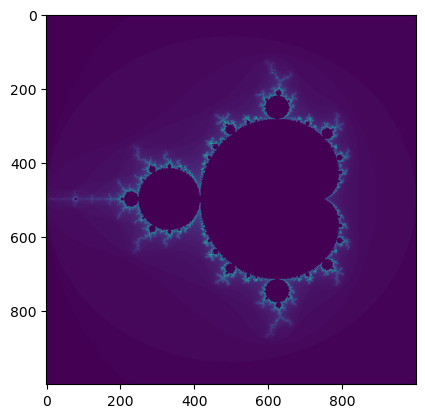

In [11]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n = n, k = k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

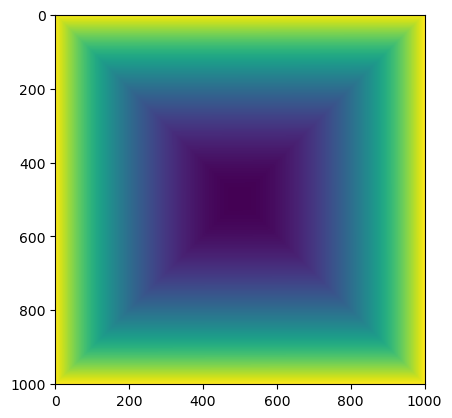

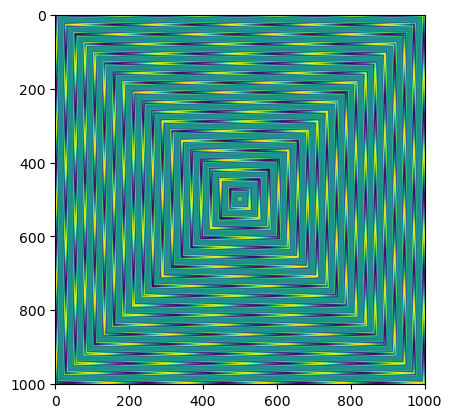

In [52]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))